In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.cm as cm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
tourism = pd.read_csv('tourism_with_id.csv')
tourism 

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monas,Budaya,Jakarta,20000,4.6,15.0
1,2,Kota Tua,Budaya,Jakarta,0,4.6,90.0
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.0
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,NaN
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.0
...,...,...,...,...,...,...,...
444,445,Museum Mpu Tantular,Budaya,Surabaya,2000,4.4,45.0
445,446,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,NaN
446,447,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya,0,4.4,45.0
447,448,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,NaN


In [ ]:
#tourism[tourism['City']=='Jakarta']

In [ ]:
tourism.isna().sum()

Place_Id          0
Place_Name        0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    236
dtype: int64

In [ ]:
tourism[tourism.isna().any(axis=1)]

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,NaN
6,7,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,NaN
7,8,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,NaN
8,9,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,NaN
9,10,Pulau Tidung,Bahari,Jakarta,150000,4.5,NaN
...,...,...,...,...,...,...,...
438,439,Patung Buddha Empat Rupa,Budaya,Surabaya,0,4.3,NaN
442,443,Taman Hiburan Rakyat,Taman Hiburan,Surabaya,5000,4.2,NaN
445,446,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,NaN
447,448,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,NaN


In [ ]:
tourism.mean()

Place_Id          225.000000
Price           24374.164811
Rating              4.443430
Time_Minutes       82.746479
dtype: float64

In [ ]:
tourism.fillna(tourism.mean(),inplace=True)

In [ ]:
tourism.isna().sum()

Place_Id        0
Place_Name      0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
dtype: int64

In [ ]:
tourism

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monas,Budaya,Jakarta,20000,4.6,15.000000
1,2,Kota Tua,Budaya,Jakarta,0,4.6,90.000000
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.746479
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000
...,...,...,...,...,...,...,...
444,445,Museum Mpu Tantular,Budaya,Surabaya,2000,4.4,45.000000
445,446,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,82.746479
446,447,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya,0,4.4,45.000000
447,448,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,82.746479


In [ ]:
jakarta_city = tourism[tourism['City']=='Surabaya']

In [ ]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism = pd.get_dummies(jakarta_city, columns=["City"])

In [ ]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])

In [ ]:
tourism

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Surabaya
403,404,Ekowisata Mangrove Wonorejo,Cagar Alam,0,4.3,60.000000,1
404,405,Taman Harmoni Keputih,Cagar Alam,0,4.4,60.000000,1
405,406,Air Mancur Menari,Taman Hiburan,35000,4.4,45.000000,1
406,407,Taman Prestasi,Taman Hiburan,0,4.6,82.746479,1
407,408,Monumen Kapal Selam,Budaya,15000,4.4,30.000000,1
408,409,Taman Kunang-Kunang,Taman Hiburan,0,4.4,45.000000,1
409,410,Taman Buah Surabaya,Taman Hiburan,0,4.1,30.000000,1
410,411,Taman Pelangi,Taman Hiburan,0,4.5,20.000000,1
411,412,Hutan Bambu Keputih,Cagar Alam,0,4.3,25.000000,1
412,413,Taman Keputran,Taman Hiburan,0,4.3,82.746479,1


In [ ]:
featureset = tourism[['Price', 'Time_Minutes']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 0.27272727],
       [0.        , 0.27272727],
       [0.28      , 0.18181818],
       [0.        , 0.41058472],
       [0.12      , 0.09090909]])

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)


[[0.         0.         0.29438829 ... 0.09090909 0.13785745 0.15938844]
 [0.         0.         0.29438829 ... 0.09090909 0.13785745 0.15938844]
 [0.29438829 0.29438829 0.         ... 0.28       0.36157175 0.30386531]
 ...
 [0.09090909 0.09090909 0.28       ... 0.         0.22876654 0.24235125]
 [0.13785745 0.13785745 0.36157175 ... 0.22876654 0.         0.08      ]
 [0.15938844 0.15938844 0.30386531 ... 0.24235125 0.08       0.        ]]


In [ ]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

array([6, 6, 1, 2, 1, 6, 3, 3, 3, 2, 8, 3, 4, 7, 3, 6, 5, 3, 0, 2, 2, 2,
       3, 6, 2, 2, 2, 3, 6, 2, 3, 3, 1, 7, 6, 2, 3, 3, 9, 2, 3, 6, 2, 6,
       2, 2], dtype=int32)

In [ ]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [ ]:
tourism['cluster_'] = agglom.labels_
tourism

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Surabaya,cluster_
403,404,Ekowisata Mangrove Wonorejo,Cagar Alam,0,4.3,60.000000,1,6
404,405,Taman Harmoni Keputih,Cagar Alam,0,4.4,60.000000,1,6
405,406,Air Mancur Menari,Taman Hiburan,35000,4.4,45.000000,1,1
406,407,Taman Prestasi,Taman Hiburan,0,4.6,82.746479,1,2
407,408,Monumen Kapal Selam,Budaya,15000,4.4,30.000000,1,1
408,409,Taman Kunang-Kunang,Taman Hiburan,0,4.4,45.000000,1,6
409,410,Taman Buah Surabaya,Taman Hiburan,0,4.1,30.000000,1,3
410,411,Taman Pelangi,Taman Hiburan,0,4.5,20.000000,1,3
411,412,Hutan Bambu Keputih,Cagar Alam,0,4.3,25.000000,1,3
412,413,Taman Keputran,Taman Hiburan,0,4.3,82.746479,1,2


In [ ]:
#import matplotlib.cm as cm
#n_clusters = max(agglom.labels_)+1
#colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
#plt.figure(figsize=(16,14))

#for color, label in zip(colors, cluster_labels):
#    subset = tourism[tourism.cluster_ == label]
#    for i in subset.index:
#            plt.text(subset.Price[i], subset.Time_Minutes[i],str(subset['model'][i]), rotation=25) 
#    plt.scatter(subset.Price, subset.Time_Minutes, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
#plt.legend()
#plt.title('Clusters')
#plt.xlabel('horsepow')
#plt.ylabel('mpg')

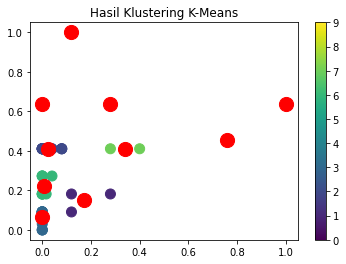

In [ ]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()